## linear regression

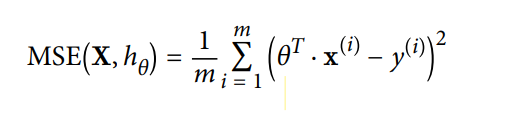

### normal form 
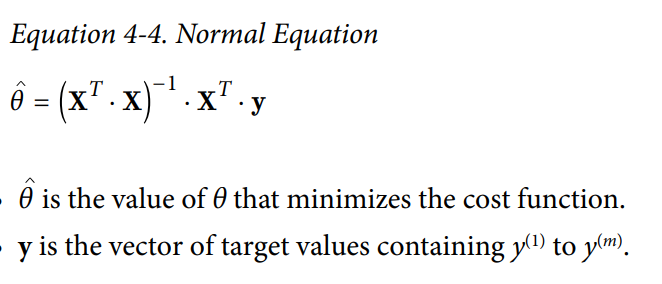

In [2]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # x0=1
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best  #(00,01)

array([[4.17562712],
       [2.87951974]])

In [4]:
#making prediction
X_new=np.array([[0],[4],[5]])
X_new_b=np.c_[np.ones((3,1)),X_new]
X_new

array([[0],
       [4],
       [5]])

In [5]:
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 4.17562712],
       [15.69370609],
       [18.57322584]])

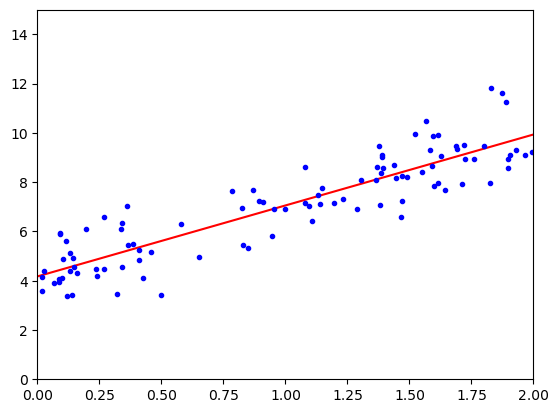

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [7]:
## scikit learn equivalent 
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,y)
reg.coef_,reg.intercept_  # Scikit-Learn separates the bias term (intercept_) from the feature weights (coef_).
reg.predict(X_new)


array([[ 4.17562712],
       [15.69370609],
       [18.57322584]])

## gradient descent 

batch gradient descent algorithm    


In [14]:
eta=0.2 #learning rate
n_itr=100
m=100

theta=np.random.randn(2,1)
for itr in range(n_itr):
    gradient=(2*X_b.T.dot(X_b.dot(theta)-y)/m)
    theta=theta-eta*gradient

In [15]:
theta

array([[4.17526466],
       [2.87981783]])

## stochastic Gradient Descent 

In [16]:
n_epoc=50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
 return t0 / (t + t1)
theta = np.random.randn(2,1) 
for epoch in range(n_epoc):
    for i in range (m):
        random_idx=np.random.randint(m)
        xi=X_b[random_idx:random_idx+1]
        yi=y[random_idx:random_idx+1]
        gradient= 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradient


In [17]:
theta

array([[4.22699628],
       [2.87959223]])

In [22]:
from sklearn .linear_model import SGDRegressor
sdg_reg=SGDRegressor(max_iter=50,penalty=None,eta0=0.2)
sdg_reg.fit(X,y)
sdg_reg.intercept_,sdg_reg.coef_

C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([4.22754763]), array([2.88510869]))